# CapStone Health Care project

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Layer
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers 
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils 


In [2]:
import os

In [3]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\capstone')

In [4]:
# Data Set1

In [5]:
df1=pd.read_csv('data.csv')

In [6]:
df1.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
df1.shape

(801, 20532)

In [8]:
df2=pd.read_csv('labels.csv')

In [9]:
df2.shape

(801, 2)

In [10]:
df2.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [11]:
df3=pd.merge(df1,df2)

In [12]:
df3.shape

(801, 20533)

In [13]:
df3.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [14]:
# Check Null values

In [33]:
df3.isnull().values.any()

False

In [16]:
df3.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [17]:
df3.dtypes

Unnamed: 0     object
gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
               ...   
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
Class          object
Length: 20533, dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
for i in df3.columns:
    if df3[i].dtypes=='object':
        df3[i]=le.fit_transform(df3[i])

In [36]:
df3.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,4
1,1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,3
2,112,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,4
3,223,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,4
4,334,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,0


In [21]:
#Additional Feature Engineering

#You will check the correlation between features and will drop those features which have a strong correlation

#This will help reduce the number of features and will leave you with the most relevant features

In [22]:
df3.columns

Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20533)

In [23]:
X = df3[['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8','Class']]

In [89]:
heatmap_data = pd.pivot_table(df3, index=['Class'])                              
heatmap_data.head()

,Unnamed: 0,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
0,414.250000,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
1,410.602564,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
2,385.760274,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
3,367.581560,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
4,411.382353,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


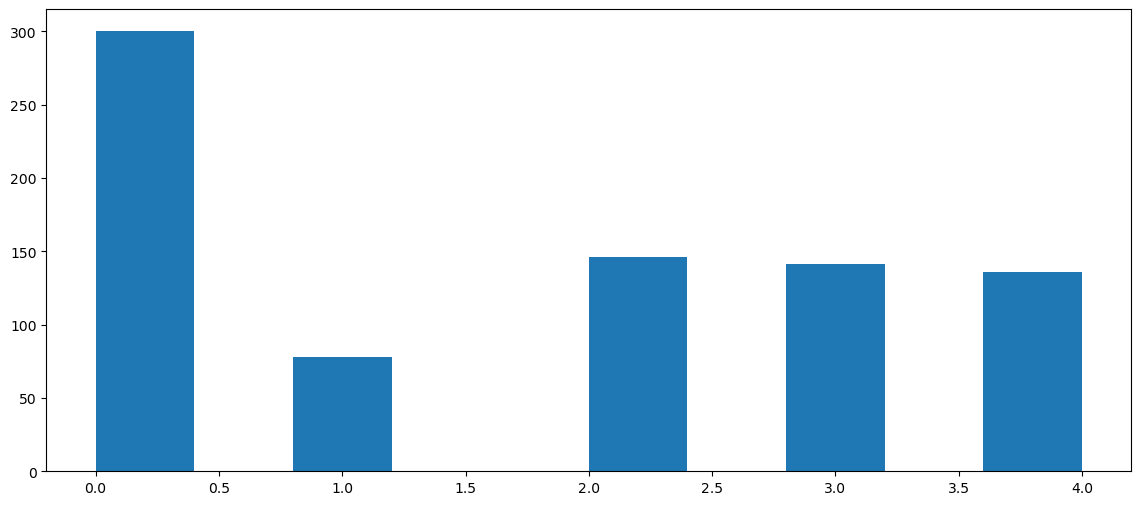

In [94]:
plt.figure(figsize=(14,6))
plt.hist(df3['Class'])
plt.show()

In [91]:
!pip install fastcluster

C:\Users\kandanulus\AppData\Local\Temp\ipykernel_78792\2170893759.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',


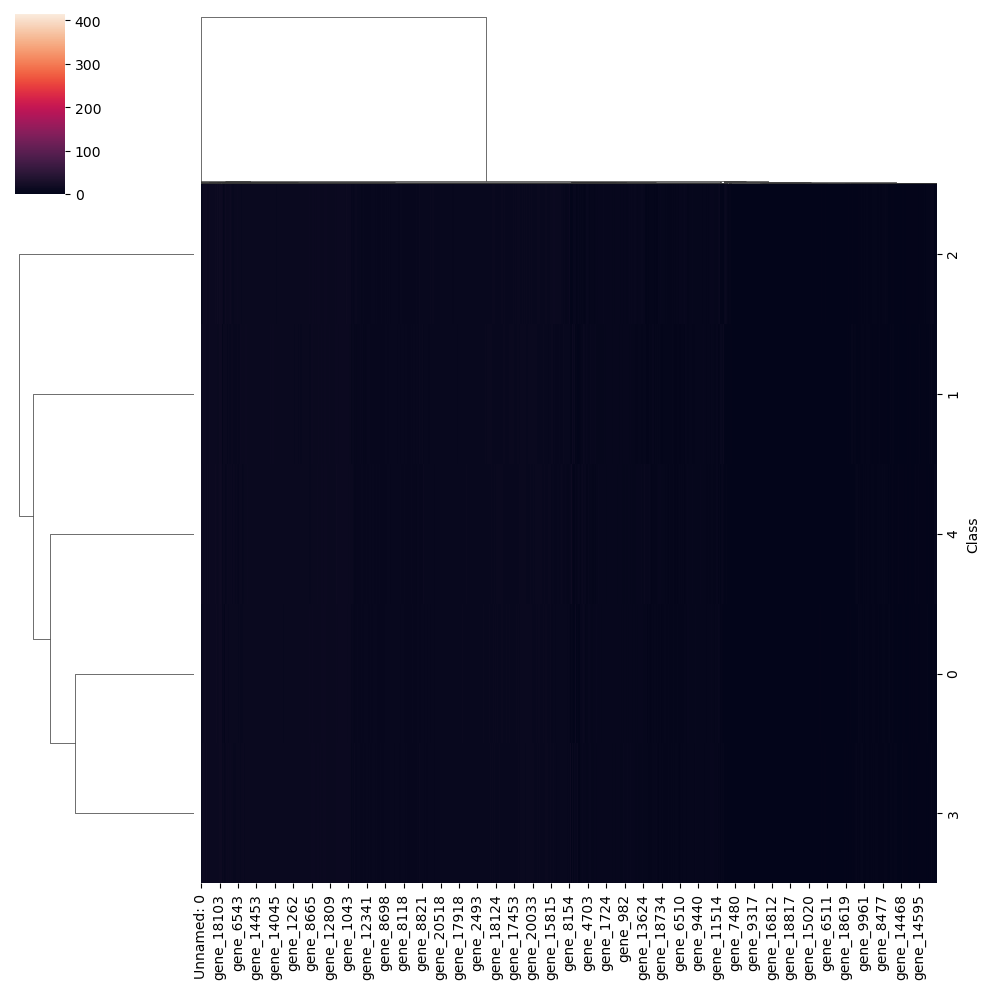

In [92]:
sns.clustermap(heatmap_data)
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',
            dpi=150, figsize=(8,12))

<AxesSubplot:>

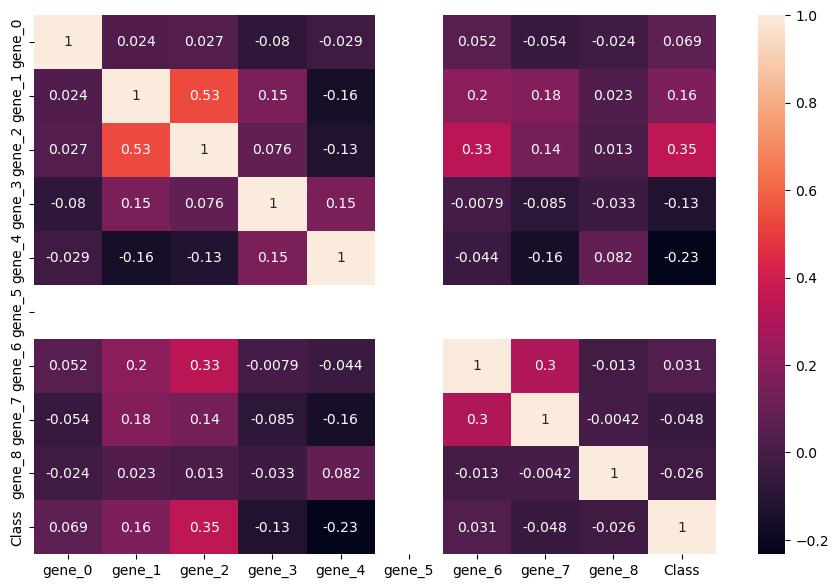

In [24]:
plt.figure(figsize=(11,7))
sns.heatmap(X.corr(),annot=True) 


# Correlation

In [25]:
X.corr().abs()['Class'].sort_values(ascending=False)

Class     1.000000
gene_2    0.346244
gene_4    0.233125
gene_1    0.159998
gene_3    0.125999
gene_0    0.068750
gene_7    0.047536
gene_6    0.030793
gene_8    0.026261
gene_5         NaN
Name: Class, dtype: float64

# Train and Test split

In [26]:
X = df3[['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8']]
y = df3[['Class']]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

In [58]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train) 
X_test=sc.transform(X_test)

In [59]:
print(X_train.shape)

(560, 9)


In [60]:
print(X_test.shape)

(241, 9)


In [61]:
# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [74]:
Reshape(X_train)
Reshape(y_train)

In [75]:
X_train

array([[-0.19800283, -0.09121482, -1.3893883 , ..., -0.71405277,
        -0.23486128, -0.13990963],
       [-0.19800283,  1.01487422,  0.8333466 , ...,  0.43011   ,
         0.22998131, -0.13990963],
       [-0.19800283,  1.60536582,  1.29486385, ...,  0.70215238,
         0.44735704, -0.13990963],
       ...,
       [11.73394721, -0.09934902,  0.89750299, ...,  2.40267833,
        -1.0037264 , -0.13990963],
       [-0.19800283,  0.30125472,  0.28943111, ..., -0.50814312,
        -1.0037264 , -0.13990963],
       [-0.19800283,  1.15395117,  1.04371508, ...,  0.47573291,
         0.85243088, -0.13990963]])

In [76]:
y_train

,Class
119,0
82,0
537,4
560,0
411,4
...,...
715,4
767,1
72,0
235,4


In [77]:
lr.fit(X_train,np.ravel(y_train))

LogisticRegression()

# Dimentionality reduction by PCA

In [97]:
df_pca = df3.drop(['Unnamed: 0'], axis=1)
df_pca = df_pca.drop(['Class'], axis=1)
df_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [98]:
df_pca.values.shape

(801, 20531)

In [99]:
x_pca = df_pca.values

# Week2:- Scaling the data using standard scaler method

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(x_pca)
X_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
# Perform PCA with n_components=2
#Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
#Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.¶
#So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

In [108]:
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

In [109]:
#Perform fit transform on the scaled data
X_pca_with_2 = pca_with_2.fit_transform(X_Scaled)
X_pca_with_2.shape

(801, 2)

In [110]:
X_pca_with_2

array([[-57.44698685,  95.41098087],
       [-16.91943014,   0.73247012],
       [-70.34521785, -19.3033268 ],
       ...,
       [ -4.13308862,  15.69001425],
       [-30.81475756,  33.52642252],
       [-22.34455683,   4.05235631]])

In [111]:
# Put the data back on the 2 columns defined 
df_pca = pd.DataFrame(X_pca_with_2)
df_pca.columns = ['pca1','pca2']

# Add the convereted categorical data for 
df_pca['cancer_type']=df_cat_data['Class']
df_pca

NameError: name 'df_cat_data' is not defined

# Project Task: Week 2
# Clustering Genes and Samples: